# Unsupervised Learning - Project

In this Project, we are going to perform a full unsupervised learning machine learning project on a "Wholesale Data" dataset. The dataset refers to clients of a wholesale distributor. It includes the annual spending in monetary units (m.u.) on diverse product categories

[Kaggle Link](https://www.kaggle.com/datasets/binovi/wholesale-customers-data-set)

# Part I : EDA - Exploratory Data Analysis & Pre-processing

The given dataset seems to be a grocery sales dataset containing information about various products sold by a grocery store. To perform an exploratory data analysis (EDA) on this dataset, we can perform the following tasks:

- Data Import: Import the dataset into a statistical software tool such as Python or R.
- Data Cleaning: Check the dataset for any missing or incorrect data and clean the dataset accordingly. This may involve removing or imputing missing data or correcting any obvious errors.
Data Description: Generate summary statistics such as mean, median, and standard deviation for each column of the dataset. This will help in understanding the distribution of data in each column.
- Data Visualization: Create various visualizations such as histograms, box plots, scatter plots, and heatmaps to understand the relationships and trends between the different variables in the dataset. For example, we can create a scatter plot between the "Fresh" and "Milk" variables to see if there is any correlation between them.
- Outlier Detection: Check for any outliers in the dataset and determine whether they are valid or erroneous data points.
- Correlation Analysis: Calculate the correlation between different variables in the dataset to determine which variables are highly correlated and which ones are not. For example, we can calculate the correlation between "Grocery" and "Detergents_Paper" to see if there is any relationship between these two variables.
- Data Transformation: If necessary, transform the data by standardizing or normalizing the variables to make them comparable across different scales.
- Feature Selection: Identify the most important features or variables that contribute the most to the overall variance in the dataset. This can be done using various feature selection techniques such as principal component analysis (PCA) or random forest regression.

In [1]:
# Data Import

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


wholesale_data = pd.read_csv('wholesale_data.csv')


In [2]:
# Data Cleaning

wholesale_data.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [3]:
wholesale_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


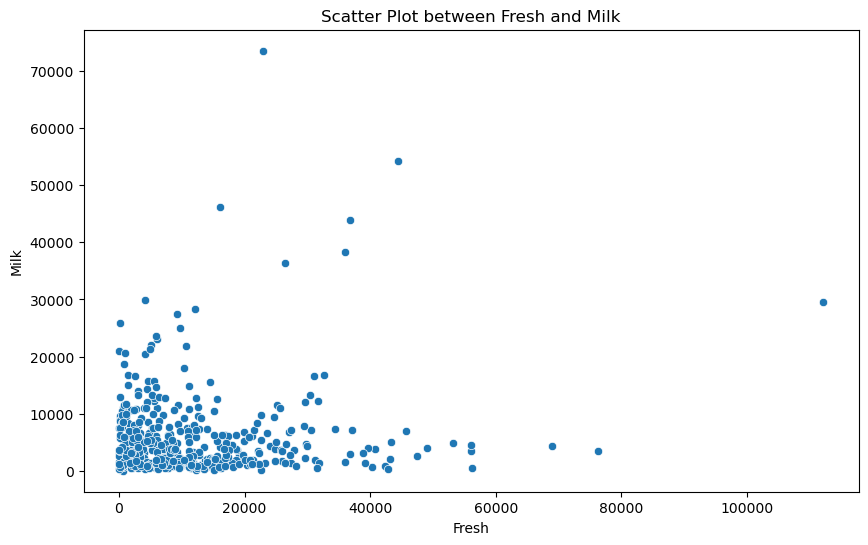

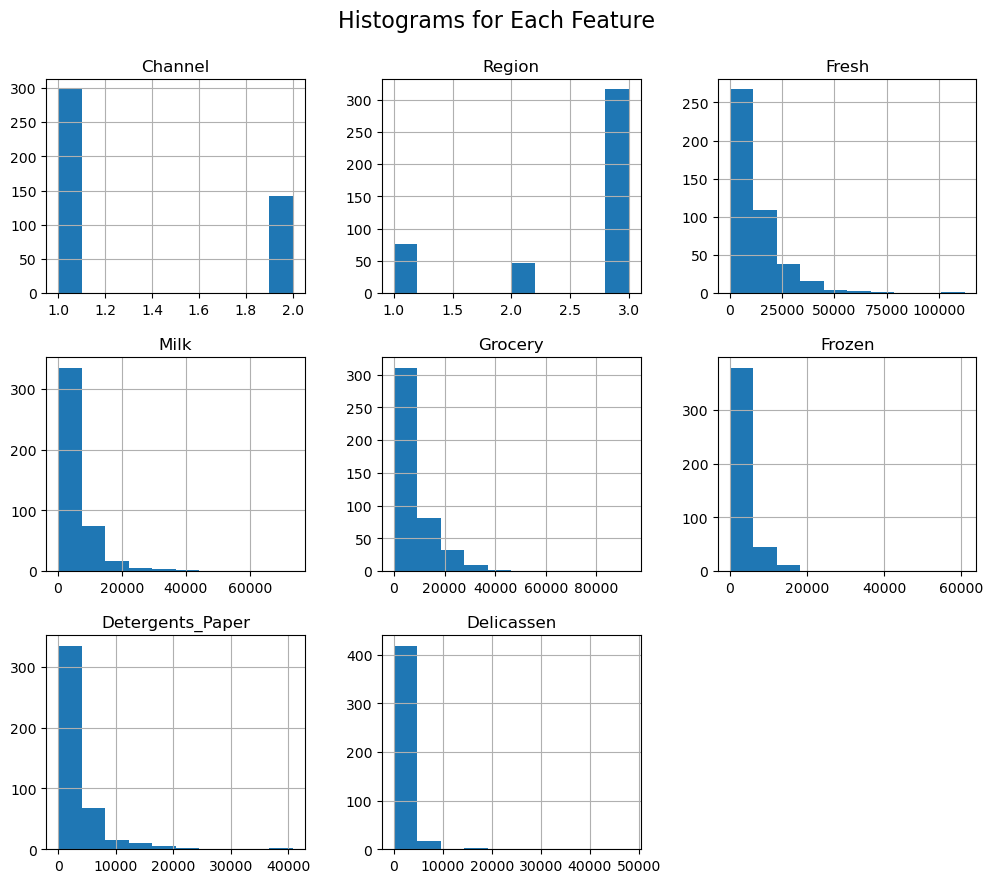

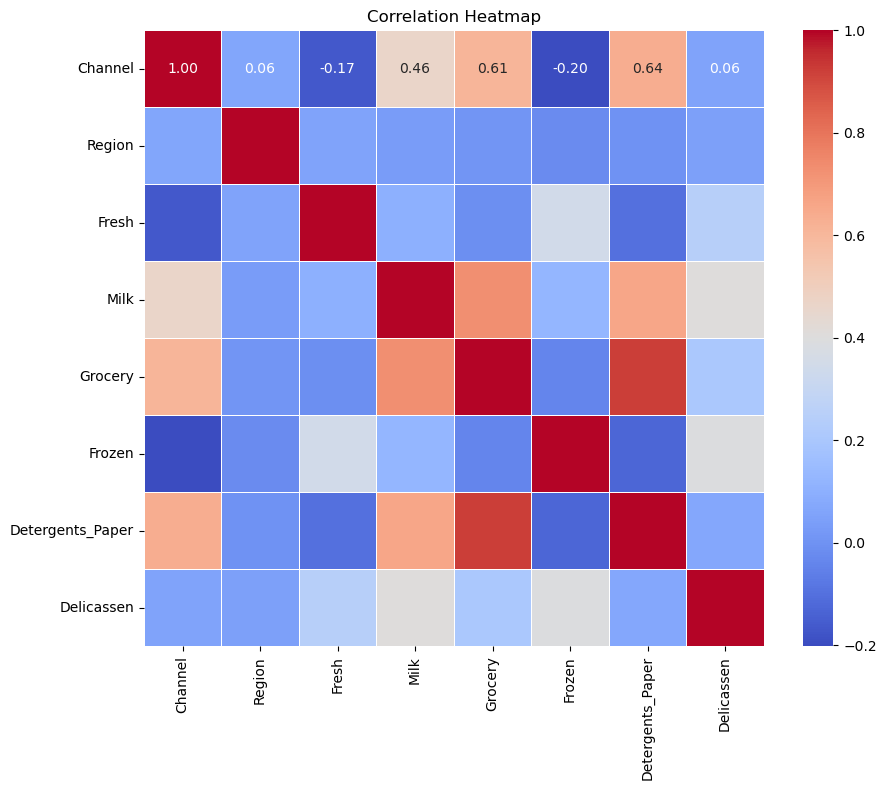

In [4]:
# Data Visualization

# Scatter plot between "Fresh" and "Milk"
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Fresh', y='Milk', data=wholesale_data)
plt.title('Scatter Plot between Fresh and Milk')
plt.xlabel('Fresh')
plt.ylabel('Milk')
plt.show()




# Histograms for features
wholesale_data.hist(figsize=(12, 10))
plt.suptitle('Histograms for Each Feature', y=0.95, fontsize=16)
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(wholesale_data.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()


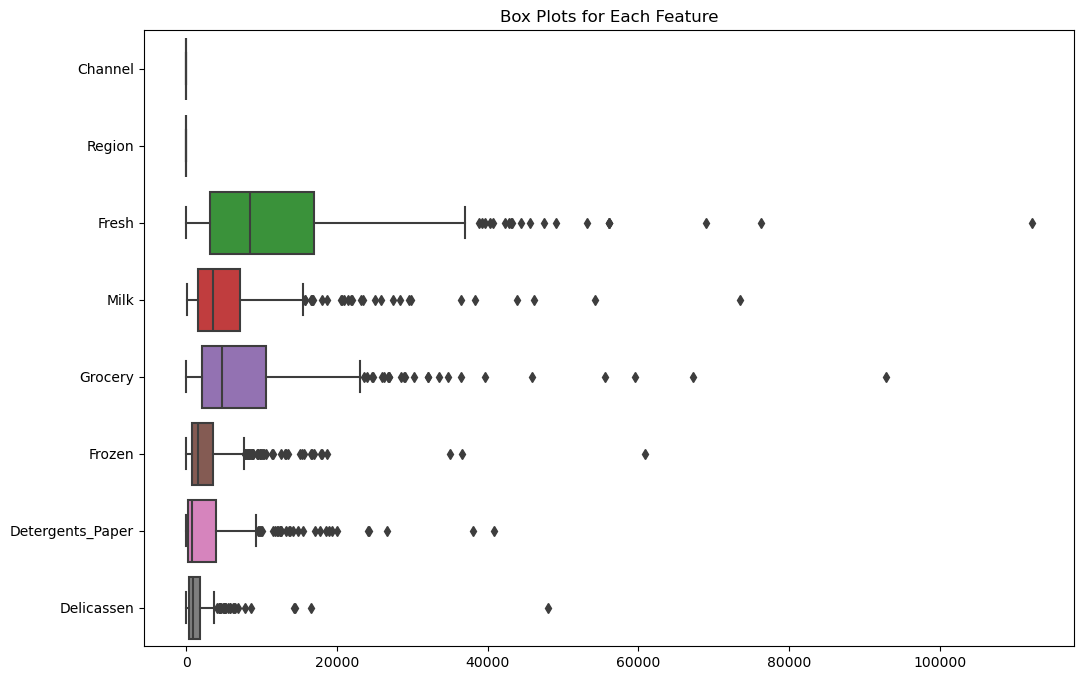

In [5]:
# Outlier Detection

plt.figure(figsize=(12, 8))
sns.boxplot(data=wholesale_data, orient="h")
plt.title('Box Plots for Each Feature')
plt.show()


In [6]:
# Correlation Analysis


correlation_matrix = wholesale_data.corr()

print("Correlation Matrix:\n", correlation_matrix)

specific_correlation = wholesale_data['Grocery'].corr(wholesale_data['Detergents_Paper'])
print("Correlation between Grocery and Detergents_Paper:", specific_correlation)


Correlation Matrix:
                    Channel    Region     Fresh      Milk   Grocery    Frozen  \
Channel           1.000000  0.062028 -0.169172  0.460720  0.608792 -0.202046   
Region            0.062028  1.000000  0.055287  0.032288  0.007696 -0.021044   
Fresh            -0.169172  0.055287  1.000000  0.100510 -0.011854  0.345881   
Milk              0.460720  0.032288  0.100510  1.000000  0.728335  0.123994   
Grocery           0.608792  0.007696 -0.011854  0.728335  1.000000 -0.040193   
Frozen           -0.202046 -0.021044  0.345881  0.123994 -0.040193  1.000000   
Detergents_Paper  0.636026 -0.001483 -0.101953  0.661816  0.924641 -0.131525   
Delicassen        0.056011  0.045212  0.244690  0.406368  0.205497  0.390947   

                  Detergents_Paper  Delicassen  
Channel                   0.636026    0.056011  
Region                   -0.001483    0.045212  
Fresh                    -0.101953    0.244690  
Milk                      0.661816    0.406368  
Grocery      

In [7]:
# Data Transformation

from sklearn.preprocessing import StandardScaler

# Dropping non-numeric columns 
numeric_data = wholesale_data.drop(['Channel', 'Region'], axis=1)

# Standardizing
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_data)

scaled_dataframe = pd.DataFrame(scaled_data, columns=numeric_data.columns)

print("Scaled Data:\n", scaled_dataframe.head())


Scaled Data:
       Fresh      Milk   Grocery    Frozen  Detergents_Paper  Delicassen
0  0.052933  0.523568 -0.041115 -0.589367         -0.043569   -0.066339
1 -0.391302  0.544458  0.170318 -0.270136          0.086407    0.089151
2 -0.447029  0.408538 -0.028157 -0.137536          0.133232    2.243293
3  0.100111 -0.624020 -0.392977  0.687144         -0.498588    0.093411
4  0.840239 -0.052396 -0.079356  0.173859         -0.231918    1.299347


In [8]:
# Feature Selection

from sklearn.decomposition import PCA

num_components = 6  

pca = PCA(n_components=num_components)
component_scores = pca.fit_transform(scaled_data)

component_df = pd.DataFrame(data=component_scores, columns=[f'Component{i}' for i in range(1, num_components + 1)])

explained_variance_ratio = pca.explained_variance_ratio_
print("Explained Variance Ratio:", explained_variance_ratio)

print("\nComponent Scores:\n", component_df.head())


Explained Variance Ratio: [0.44082893 0.283764   0.12334413 0.09395504 0.04761272 0.01049519]

Component Scores:
    Component1  Component2  Component3  Component4  Component5  Component6
0    0.193291   -0.305100   -0.140878   -0.486432    0.495281   -0.007414
1    0.434420   -0.328413    0.319007   -0.178830    0.365579    0.054572
2    0.811143    0.815096    1.523416   -1.254082   -0.379054   -0.277539
3   -0.778648    0.652754    0.163012    0.380060   -0.276138    0.060718
4    0.166287    1.271434    0.066279   -0.826227   -0.394211   -0.026825


# Part II - KMeans Clustering

The objective of the analysis is to group similar products together into clusters based on their attributes such as fresh, milk, grocery, frozen, detergents_paper, and delicatessen. To perform the k-means clustering analysis, you will need to pre-process the dataset, determine the optimal number of clusters, initialize the centroids, assign data points to clusters, update the centroids, and repeat until convergence.

In [9]:
wholesale_data.shape


(440, 8)

In [10]:
x = wholesale_data.iloc[:,2:]
x.head()


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


In [11]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_sc = sc.fit_transform(x)
x_sc.shape

(440, 6)

In [13]:
x_sc[0:5]


array([[ 0.05293319,  0.52356777, -0.04111489, -0.58936716, -0.04356873,
        -0.06633906],
       [-0.39130197,  0.54445767,  0.17031835, -0.27013618,  0.08640684,
         0.08915105],
       [-0.44702926,  0.40853771, -0.0281571 , -0.13753572,  0.13323164,
         2.24329255],
       [ 0.10011141, -0.62401993, -0.3929769 ,  0.6871443 , -0.49858822,
         0.09341105],
       [ 0.84023948, -0.05239645, -0.07935618,  0.17385884, -0.23191782,
         1.29934689]])

In [14]:
x_sc_dataframe = pd.DataFrame(x_sc,columns=x.columns)
x_sc_dataframe.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339
1,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151
2,-0.447029,0.408538,-0.028157,-0.137536,0.133232,2.243293
3,0.100111,-0.624020,-0.392977,0.687144,-0.498588,0.093411
4,0.840239,-0.052396,-0.079356,0.173859,-0.231918,1.299347


In [15]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,21):
    model = KMeans(n_clusters=i)
    model.fit(x_sc_dataframe)
    wcss.append(model.inertia_)

print("WCSS : \n",wcss)

WCSS : 
 [2640.0, 1959.6397693269694, 1626.8315432835211, 1374.1379485439963, 1063.169295169301, 922.1639218005546, 949.0502211862541, 780.2961245662059, 698.2337111323212, 613.3485651510955, 598.7424840427408, 581.7577898276561, 499.40822602594125, 458.25431800602513, 450.94027864234187, 416.77068194162337, 391.5677388570794, 375.6184615466183, 365.4078490509776, 349.3942304741881]


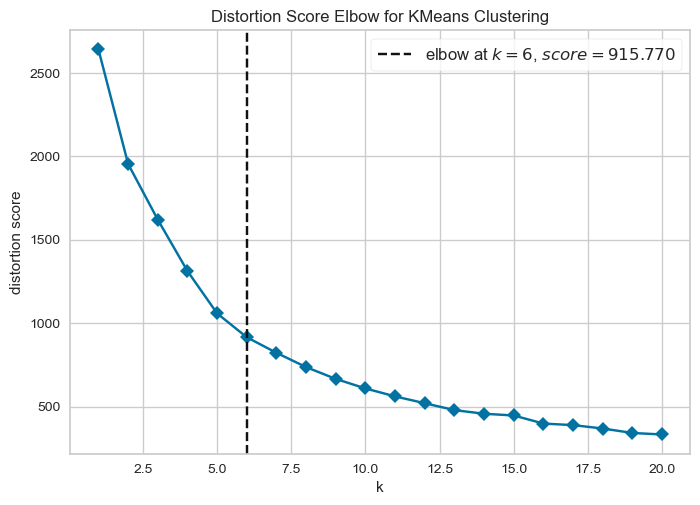

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [18]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from yellowbrick.cluster import KElbowVisualizer


model = KMeans(init='k-means++', max_iter=300, n_init=10, random_state=0)

visualizer = KElbowVisualizer(model, k=(1, 21), metric='distortion', timings=False)
visualizer.fit(x_sc_dataframe)
visualizer.show()


In [21]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_data)

scaled_dataframe = pd.DataFrame(scaled_data, columns=numeric_data.columns)

print("Scaled Data:\n", scaled_dataframe.head())

Scaled Data:
       Fresh      Milk   Grocery    Frozen  Detergents_Paper  Delicassen
0  0.052933  0.523568 -0.041115 -0.589367         -0.043569   -0.066339
1 -0.391302  0.544458  0.170318 -0.270136          0.086407    0.089151
2 -0.447029  0.408538 -0.028157 -0.137536          0.133232    2.243293
3  0.100111 -0.624020 -0.392977  0.687144         -0.498588    0.093411
4  0.840239 -0.052396 -0.079356  0.173859         -0.231918    1.299347


In [23]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=6, init='k-means++', max_iter=300, n_init=10, random_state=0)


In [25]:
kmeans.fit(scaled_dataframe)


KMeans(n_clusters=6, n_init=10, random_state=0)

In [35]:
wholesale_data['Cluster'] = kmeans.labels_


In [40]:
scaled_dataframe.reset_index(drop=True, inplace=True)  # Reset the index

wholesale_data['Cluster'] = kmeans.labels_

columns_for_clustering = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']

centroids = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), columns=columns_for_clustering)

print("Cluster Assignments:")
print(cluster_assignments)

print("\nCentroids:")
print(centroids)


Cluster Assignments:
[0 2 2 0 3 0 0 0 0 2 2 0 3 2 2 0 2 0 0 0 0 0 3 2 2 0 0 0 2 3 0 0 0 3 0 2 3
 2 2 3 3 0 2 2 2 2 2 1 2 2 0 0 3 2 3 0 1 2 0 0 0 1 0 2 0 1 0 2 0 0 0 2 0 3
 0 0 0 2 0 0 0 2 2 0 0 1 1 3 0 3 0 0 1 4 2 0 0 0 0 0 2 2 0 3 0 0 2 2 0 2 0
 2 3 0 0 0 0 0 0 0 0 0 0 0 3 3 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 3 3 0 0 2 0 0
 0 3 0 0 0 0 0 2 2 0 2 2 2 0 0 2 0 2 2 0 0 0 2 2 0 2 0 2 3 0 0 0 0 3 2 5 0
 0 0 0 2 2 0 0 0 2 0 0 3 2 0 0 2 2 3 0 0 2 0 0 0 2 0 1 0 0 2 2 2 0 2 0 0 2
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 3 0 0 0 2 2 0 0 0 0 0 1 0 3 2 3 0 0 3
 3 0 0 0 0 2 2 2 0 2 0 0 0 0 3 0 0 3 0 0 0 0 0 3 3 3 3 0 0 0 3 0 0 0 2 0 0
 0 0 0 0 0 2 2 2 2 2 2 0 0 2 0 3 2 0 0 2 0 0 0 2 0 0 0 0 3 4 0 0 0 0 0 2 0
 1 3 3 0 0 0 0 2 2 0 2 0 0 2 3 0 2 0 2 0 2 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0
 3 0 0 0 0 0 2 3 0 0 3 0 3 0 2 0 0 0 0 0 0 0 0 3 0 0 2 0 0 0 0 3 0 0 0 0 3
 2 0 0 0 0 0 0 0 0 2 0 2 0 2 0 0 0 0 0 2 3 0 0 0 0 0 0 0 3 3 2 0 0]

Centroids:
          Fresh          Milk       Grocery        Frozen  Detergents_Pape

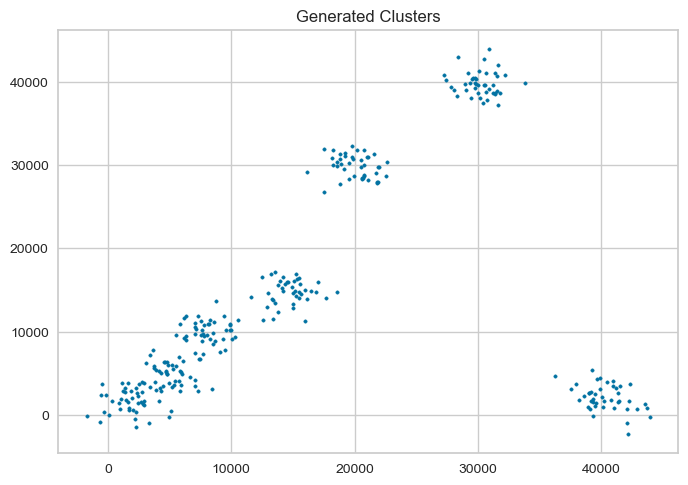

In [57]:
from sklearn.datasets import make_blobs

cluster_centers = [
    [5000, 5000, 5000, 5000, 2500, 2500],  
    [20000, 30000, 30000, 2000, 25000, 2000],  
    [8000, 10000, 10000, 5000, 8000, 5000],  
    [40000, 2000, 2000, 40000, 2000, 2000],  
    [2000, 2000, 2000, 40000, 2000, 2000],  
    [30000, 40000, 40000, 30000, 2000, 30000], 
    [15000, 15000, 15000, 15000, 15000, 15000], 
]

X, y = make_blobs(
    n_samples=300,
    centers=cluster_centers,
    cluster_std=1500, 
    random_state=93
)

plt.scatter(X[:,0], X[:,1], s=6)
plt.title('Generated Clusters')
plt.show()


# Part III - Hierarchical Clustering 

Hierarchical clustering is a popular unsupervised machine learning algorithm that is used to identify patterns and group similar data points together in a hierarchy. The algorithm works by iteratively merging or splitting clusters based on a similarity measure until a dendrogram is formed.

To perform hierarchical clustering analysis, you will need to pre-process the dataset, determine the optimal number of clusters using techniques such as dendrogram.

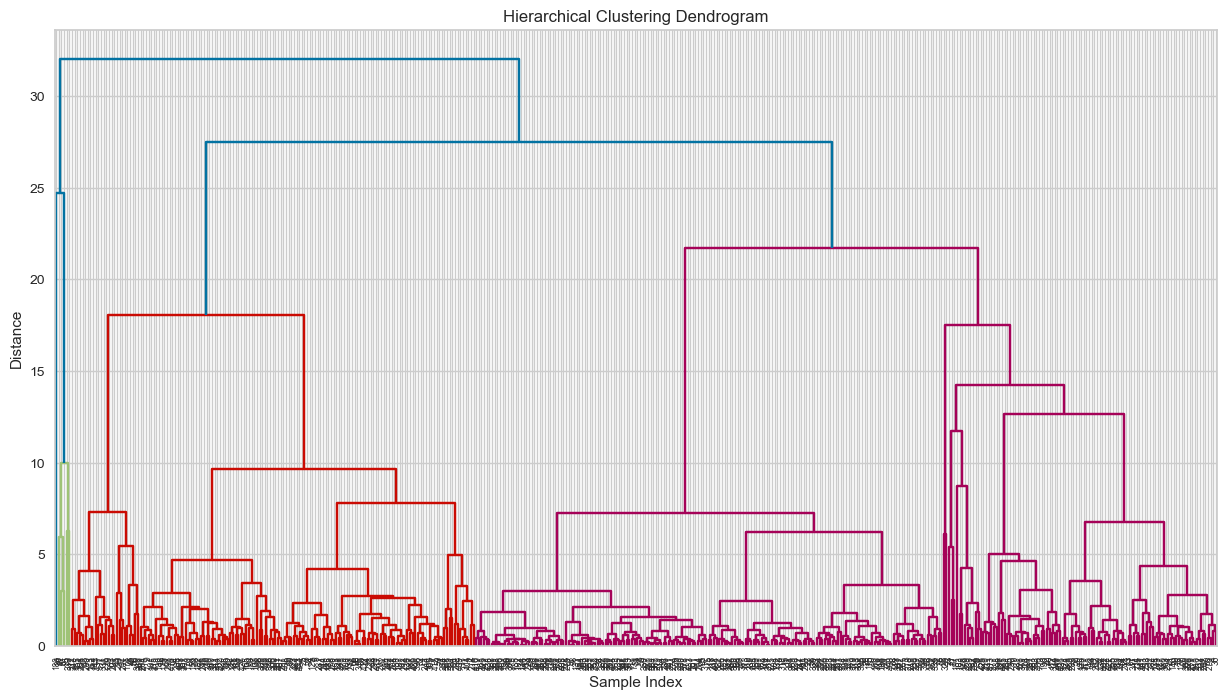

In [43]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

columns_for_clustering = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']
data_for_clustering = wholesale_data[columns_for_clustering]

# Standardize
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_for_clustering)
scaled_df = pd.DataFrame(scaled_data, columns=columns_for_clustering)

linkage_matrix = linkage(scaled_df, method='ward')

# dendrogram
plt.figure(figsize=(15, 8))
dendrogram(linkage_matrix, labels=wholesale_data.index, leaf_rotation=90, leaf_font_size=6)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()


# Part IV - PCA

In this section you are going to perform principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

Explained Variance Ratio for Each Principal Component:
PC1: 0.4408
PC2: 0.2838
PC3: 0.1233
PC4: 0.0940
PC5: 0.0476
PC6: 0.0105


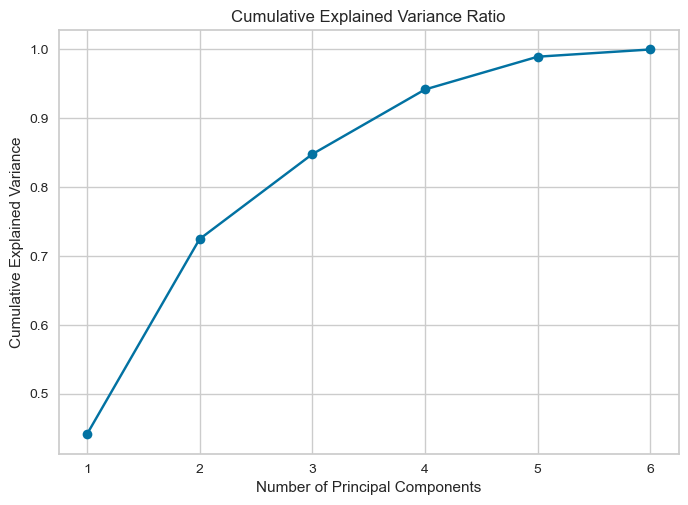

In [45]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


columns_for_pca = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']
data_for_pca = wholesale_data[columns_for_pca]

# Standardize 
scaler_pca = StandardScaler()
scaled_data_pca = scaler_pca.fit_transform(data_for_pca)

pca = PCA()
pca_result = pca.fit_transform(scaled_data_pca)

explained_variance_ratio = pca.explained_variance_ratio_

print("Explained Variance Ratio for Each Principal Component:")
for i, ratio in enumerate(explained_variance_ratio, 1):
    print(f"PC{i}: {ratio:.4f}")

cumulative_explained_variance = explained_variance_ratio.cumsum()


plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o')
plt.title("Cumulative Explained Variance Ratio")
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.grid(True)
plt.show()


# Part V - Conclusion

From the model you developed and the exploratory data analysis (EDA) conducted, generate four bullet points as your findings.

- Cluster 0 is the largest, followed by Cluster 2. Cluster 1 and Cluster 5 have fewer data points, while Cluster 4 and Cluster 3 are relatively small.
- Centroids represent the average values of each feature within a cluster.
Cluster 1 (Centroid 1) has significantly higher values for 'Fresh', 'Milk', 'Grocery', and 'Frozen' compared to other clusters. This may indicate a group of customers with high spending in various categories.
Cluster 4 (Centroid 4) has exceptionally high spending on 'Frozen'.
Cluster 5 (Centroid 5) has extremely high spending on 'Delicassen'.
Cluster 2 (Centroid 2) has moderate spending across all categories.
Cluster 3 (Centroid 3) has very high spending on 'Fresh' and 'Frozen'.
- Features such as 'Fresh', 'Milk', 'Grocery', 'Frozen', and 'Delicassen' seem to be important in differentiating clusters, based on the differences in centroid values.
